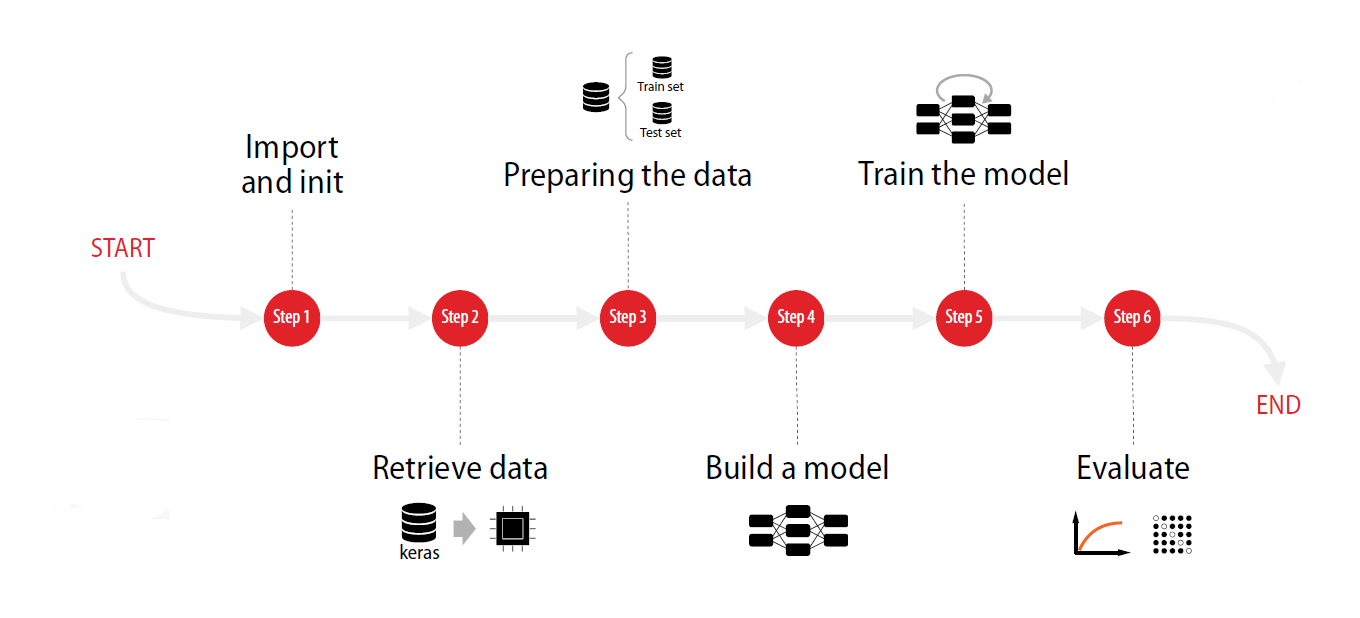

# How to activate GPU in google colab:

To activate the GPU on Google Colab, follow these steps:

* Open your project in Google Colab.
* Click on the "Edit" tab in the menu bar.
* Select "Notebook Settings" from the dropdown menu.
* In the "Hardware Accelerator" section, choose "GPU" as the preferred option.
* Click on the "Save" button to apply the changes.

To verify if the GPU is working properly on Google Colab, you can run the following code snippet:

In [ ]:
import tensorflow as tf

# Check GPU availability
if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print("No GPU found")

No GPU found


# CIFA10 datset

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of images from the famous CIFAR-10 dataset (Canadian Institute For Advanced Research).  The CIFAR-10 is a collection of images that are commonly used to train machine learning and computer vision algorithms.  The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class

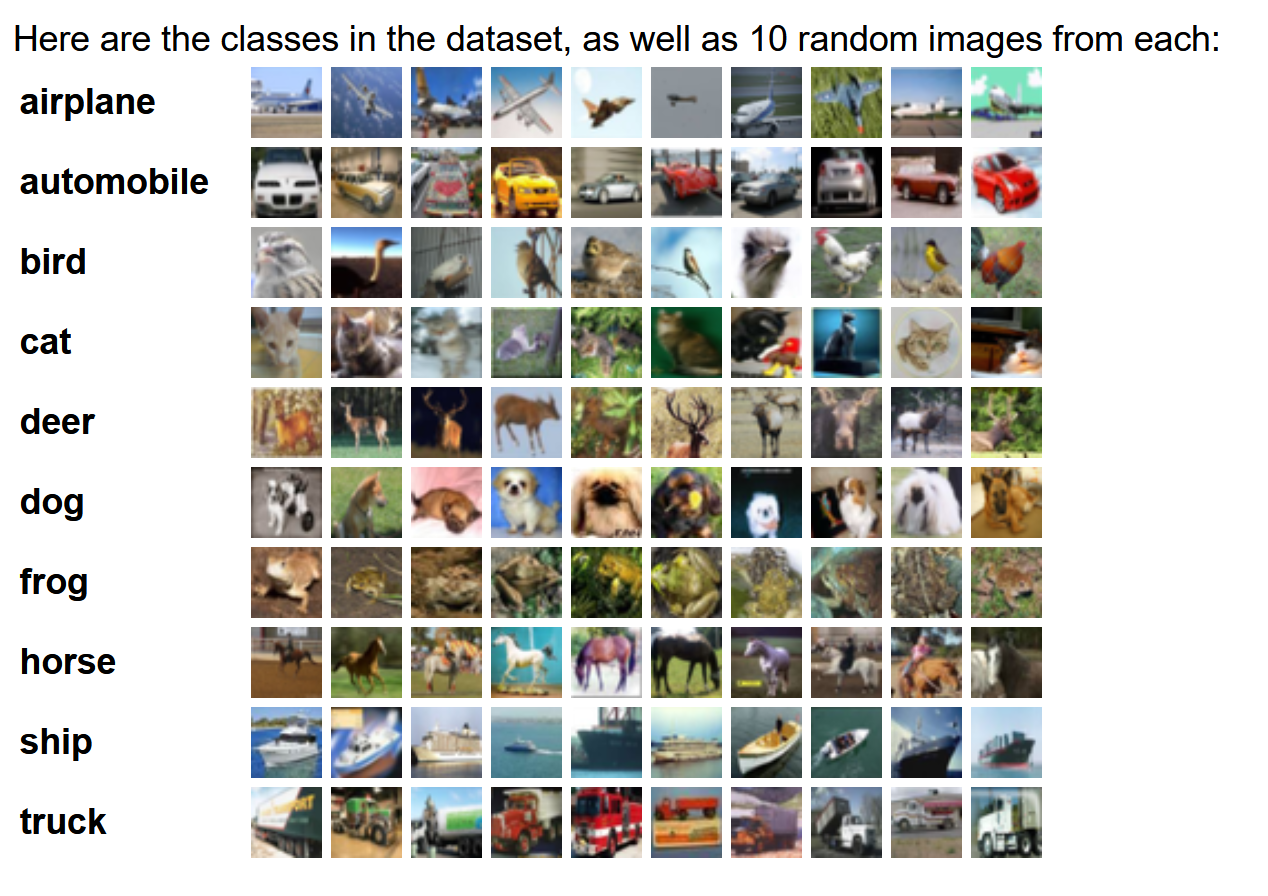

## Exe1: Load the CIFAR-10 dataset from Keras

In [ ]:
#loading dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Exe2:

 Train and test datasets (x_train and x_test) containing pixel values ranging from 0 to 255. Using the TensorFlow and Keras libraries, implement the following steps:

* Convert the train_X and test_X datasets to the float32 data type.
* Normalize the pixel values in both datasets to a range between 0 and 1.

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
len(train_images)

50000

In [ ]:
test_images[0].shape

(32, 32, 3)

Let's visualize what some of these images and their corresponding training labels look like.

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


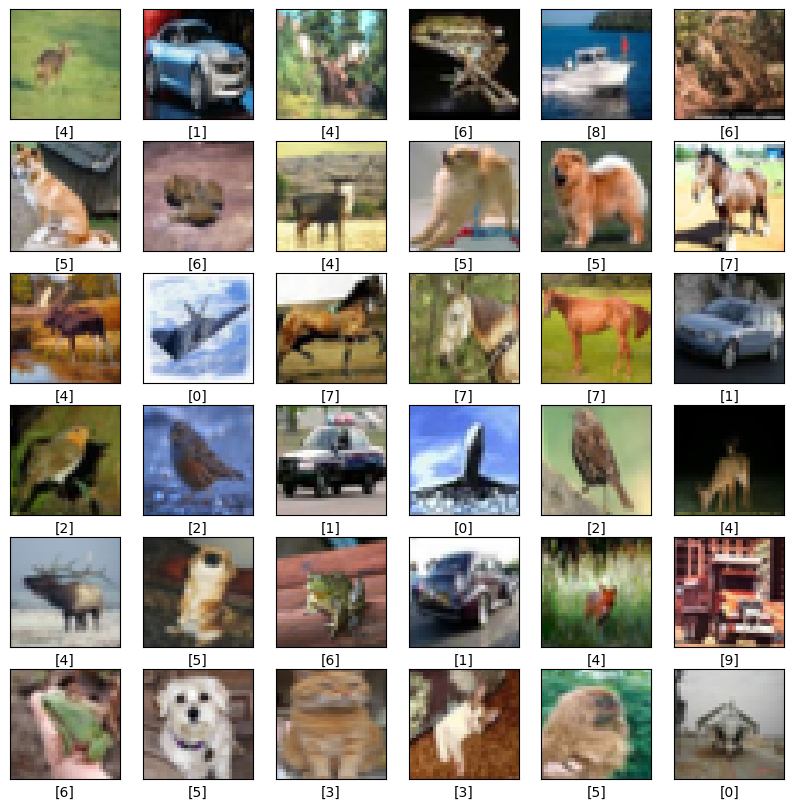

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(10,10))
random_inds = np.random.choice(50000,36)
class_names = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
    #plt.xlabel(class_names[train_labels[image_ind][0]])

# Fully connected neural network architecture

To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the Sequential class. Note how we first use a Flatten layer, which flattens the input so that it can be fed into the model.


In [ ]:


def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(input_shape='''TODO'''),

      # Define the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(512, activation=tf.nn.relu),

       # Define  the second fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),


      #Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense('''TODO''', activation='''TODO''')

  ])
  return fc_model

model = build_fc_model()




In [ ]:
model.summary()


Let's take a step back and think about the network we've just created. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 6d-array (32 x 32 x 3 pixels), to a 1d-array of 32 * 32 * 3 = 3072 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model!

**Compile the model**

Before training the model, we need to define a few more settings. These are added during the model's compile step:

* *Loss function* — This defines how we measure how accurate the model is during training. We want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).


In [ ]:

model.compile(optimizer='''TODO''',
              loss='''TODO''',
              metrics='''TODO''')




**Train the model**

We're now ready to train our fully connected model
, which will involve feeding the training data (`train_images` and `train_labels`) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the CIFAR10 dataset, to use during training.



In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 10

model.fit('''TODO''')


**Evaluate accuracy on the test dataset**

Now that we've trained the model, we can ask it to make predictions about a test set that it hasn't seen before. In this example, the `test_images` array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the `test_labels` array.

Use the `evaluate` method to evaluate the model on the test dataset!


In [ ]:

test_loss, test_acc = '''TODO'''
print('Test accuracy:', test_acc)



# Convolutional Neural Network (CNN)

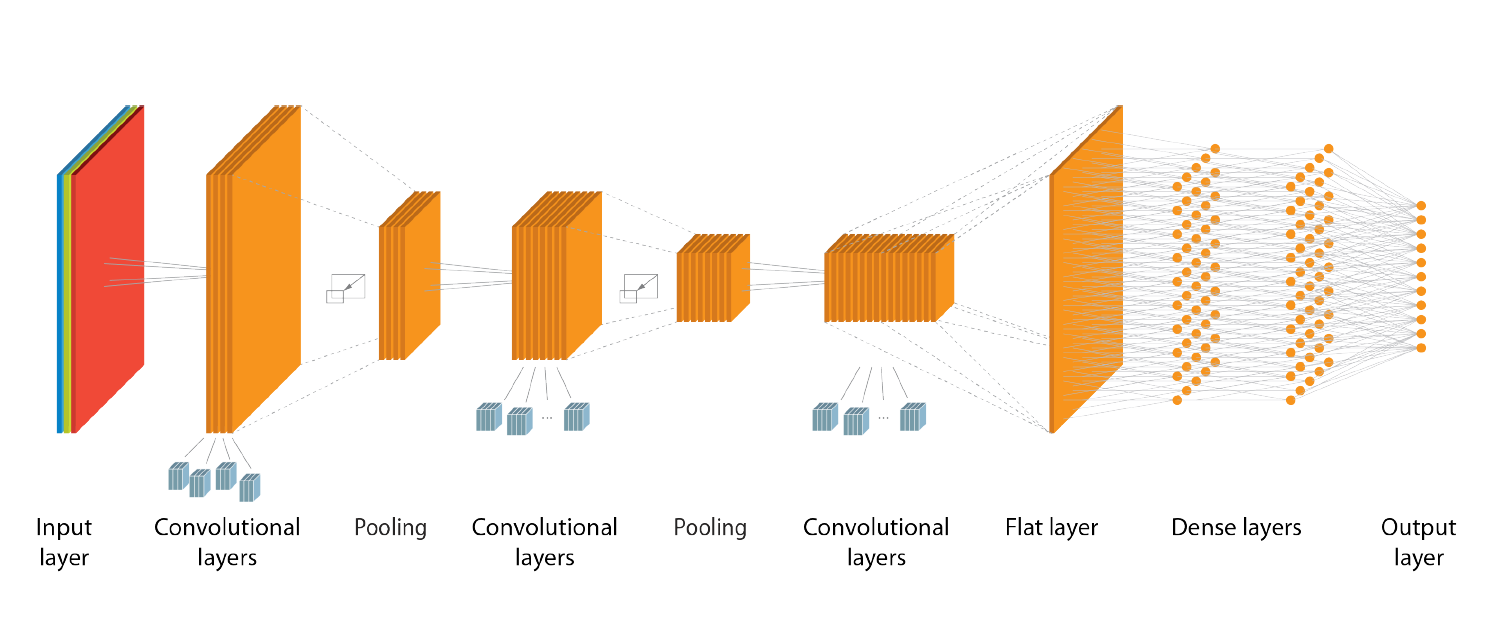



**Define the CNN model**

We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before:
* You can use `keras.layers.Conv2D` to define convolutional layers and keras :

  ```
  keras.layers.Conv2D(filters, kernel_size=(...), strides=(...), padding=(...)
                      , activation=(...), input_shape=(...))
  ```


 You need to specify the `filters`,` kernel_size`, `strides`, `padding`, `activation`, and `input_shape` parameters according to your specific requirements. The layer creates a convolution kernel that convolves with the input data to produce a tensor of outputs. The activation parameter determines the activation function applied to the outputs. If activation is set to None, no activation function is applied. The `input_shape` parameter is necessary when using this layer as the first layer in a model. For more details, refer to the [Keras documentation](https://keras.io/api/layers/convolution_layers/).


* You can use `layers.MaxPool2D` to define the pooling layers:

  `keras.layers.MaxPooling2D(pool_size=(...), strides=(...), padding=(...))`

You need to provide the `pool_size`, `strides`, and `padding` arguments according to your needs. The `pool_size` parameter determines the downsampling factors in the vertical and horizontal dimensions. If a single integer is provided, it will be used for both dimensions. The `strides` parameter specifies the stride values, and the `padding` parameter can be set to "valid" or "same" for different padding options.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


## Exe 1: Build CNN model

**Use the parameters shown above to define these layers and build the CNN  with the following architecture:**

`CONV - POOL - CONV - POOL- FC - FC`

* The three 2D convolutional layers (CONV) have filter sizes of 3x3. In the Conv2D() function, set kernel_size to 3.
* The number of channels (filters) used for the three convolutional layers are 32, 64 respectively.
* Two 2x2 max pooling layers (POOL) with a stride of 2 are used.
* The two fully connected layers (FC) have sizes of 128 and 10 respectively.
* A ReLU activation function is used for all layers except the last FC layer.
* A Softmax activation function is used for the final layer.
* The input size of the network is set to that of CIFAR-10 RGB images, which is 32x32x3.
* Before passing the output of the previous layer to the first FC layer, use keras.layers.Flatten() to flatten the output.

In [ ]:


def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters='''TODO''', kernel_size='''TODO''', kernel_initializer='''TODO''', activation='''TODO''',input_shape = '''TODO'''),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size='''TODO''',strides='''TODO'''),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        '''TODO'''
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        '''TODO'''
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense('''TODO''', activation='''TODO''', kernel_initializer='''TODO'''),

        # TODO: Define the last Dense layer to output the classification
        # probabilities. Pay attention to the activation needed a probability
        # output
        '''TODO'''
    ])

    return cnn_model

cnn_model = build_cnn_model()





**Print the summary of the layers in the model**

In [ ]:
#TODO

**Chek the number of parameters of each layers**

The number of parameters in a convolutional layer is given by the formula:

$P_n = [(m \times n \times C_i) + 1] \times C_o$

where $P_n$ is the number of parameters, $m \times n$ represent the filter dimensions, $C_i$ and $C_o$ are the input and output channel (feature map) dimensions, respectively, for a convolutional layer. The addition of one to the inner factor accounts for biases applied to the feature maps.

The dimensions of the output data matrix, On, after filtering or pooling can be calculated using the following equation:

$O_n = \frac{(N - F)}{S} + 1$

where N is the input dimension, F is the filter dimension (same for both width and height, i.e., $ m = n = F$ ), and S is the filter stride length.

Pooling layers do not contribute any parameters to be optimized as they simply perform a computation (average or maximum) based on the values captured by the pooling filter.

Compute the $P_n$ and $O_n$ of your network and verify your calculation

In [ ]:
'''TODO'''

896

In [ ]:
'''TODO'''

18496

In [ ]:
'''TODO'''

295040

In [ ]:
'''TODO'''

1290

## Exe 2 : Train and test the CNN model

Now, as before, we can define the loss function, optimizer, and metrics through the compile method.

**Compile the CNN model with an `adam` optimizer, and learning rate of choice and a `sparse categorical crossentropy` loss function**.


In [ ]:

# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO





As was the case with the fully connected model, we can train our CNN using the fit method via the Keras API.


**Train the model using 20% of the data as validation data, with a batch size of 512 and 10 epochs.**

  In model.fit(), the validation_split parameter is a floating-point value between 0 and 1. It represents the fraction of the training data that will be used as validation data. The model will set apart this fraction of the training data, not train on it, and evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the X and y data provided, before shuffling. Please note that this argument is not supported when X is a generator or Sequence instance.




In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 512
EPOCHS = 10

#cnn_model.fit('''TODO''')

Great! Now that we've trained the model, let's evaluate it on the test dataset using the evaluate method `model.evaluate()`.


**Print accuracy and loss of the evaluated model on the test dataset.**


In [ ]:
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)




## Exe 3: Make predictions with the CNN model

With the model trained, we can use it to make predictions about some images. The predict function call generates the output predictions given a set of input samples.

**Predict the test dataset using the `model.predict()` method**

In [ ]:
predictions = # TODO



With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:


**Check the predicted image label of the first image.**

In [ ]:
# TODO



As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different classes.

**Print the class that has the highest confidence for the first image in the test dataset**


In [ ]:

# prediction = # TODO

#print(class_names[prediction])




cat




**Check the test label to see if this prediction is correc**t


Label of this image is: cat


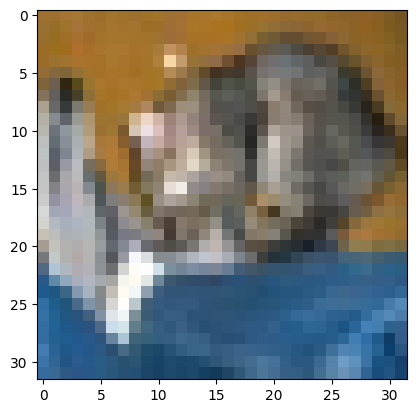

In [ ]:
image_ind = 0
print("Label of this image is:",class_names[''TODO'''])
plt.imshow(''TODO''')




It is! Let's visualize the classification results on the CIFAR10 dataset. We will plot images from the test dataset along with their predicted label, as well as a histogram that provides the prediction probabilities for each of the images:


In [ ]:
def plot_image_prediction(i, predictions_array, class_names, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_prediction(i, predictions_array, class_names, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.xticks(range(10), class_names, rotation=45, ha='right')


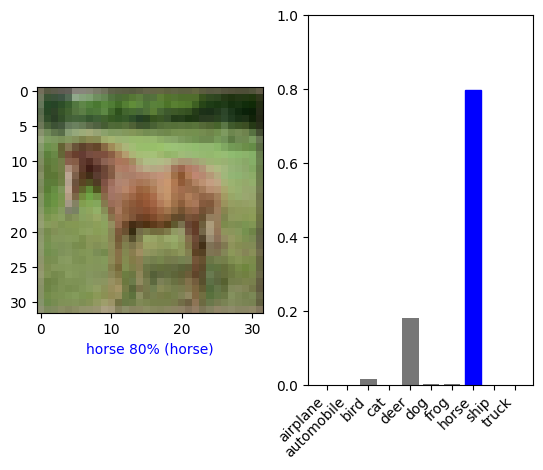

In [ ]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 48 #@param {type:"slider", min:0, max:100, step:1}

plt.subplot(1,2,1)
plot_image_prediction(image_index, predictions,class_names,  test_labels, test_images)
plt.subplot(1,2,2)
plot_value_prediction(image_index, predictions, class_names, test_labels)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are grey. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

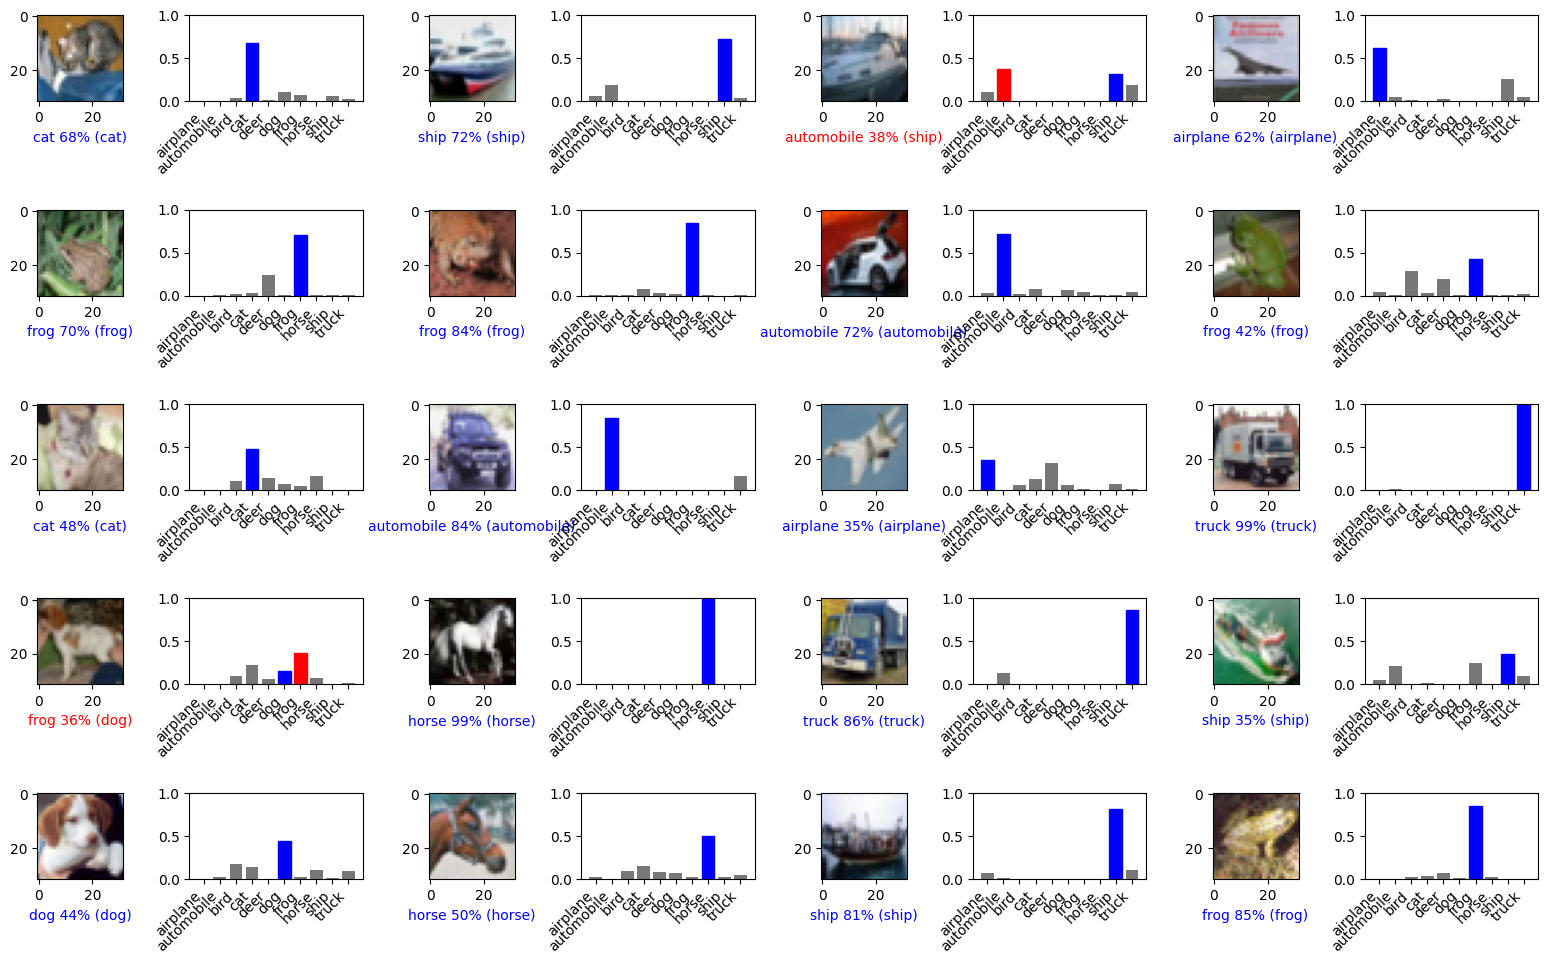

In [ ]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_prediction(i, predictions, class_names,test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_prediction(i, predictions, class_names,test_labels)
  plt.tight_layout(pad=2.0)  # Adjust the spacing between rows

# ResNet architecture

In [ ]:
from tensorflow.keras import layers

inp = tf.keras.Input(shape=(32,32,3))

x = layers.Conv2D(16, (3,3),(2,2),kernel_initializer='he_uniform')(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (3,3),(2,2),kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)
block1 = layers.Dropout(0.2)(x)

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(block1)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
block2 = layers.add([x, block1])

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(block2)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

block3 = layers.add([x, block2])

x = layers.GlobalAveragePooling2D()(block3)
x = layers.Dense(500, activation='relu',kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

resnet_model = keras.Model(inputs=inp, outputs=out)




In [ ]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 15, 15, 16)   448         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 15, 15, 16)  64          ['conv2d_18[0][0]']              
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 15, 15, 16)   0           ['batch_normalization[0][0]']

In [ ]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 512
EPOCHS = 10

resnet_model.fit(train_images, train_labels, validation_split=0.2, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
79/79 [==============================] - 19s 199ms/step - loss: 2.0480 - accuracy: 0.2732 - val_loss: 2.1534 - val_accuracy: 0.2148
Epoch 2/10
79/79 [==============================] - 15s 195ms/step - loss: 1.7156 - accuracy: 0.3730 - val_loss: 1.9714 - val_accuracy: 0.2620
Epoch 3/10
79/79 [==============================] - 17s 212ms/step - loss: 1.6013 - accuracy: 0.4106 - val_loss: 1.7539 - val_accuracy: 0.3547
Epoch 4/10
79/79 [==============================] - 15s 188ms/step - loss: 1.5148 - accuracy: 0.4452 - val_loss: 1.6267 - val_accuracy: 0.4053
Epoch 5/10
79/79 [==============================] - 17s 212ms/step - loss: 1.4602 - accuracy: 0.4672 - val_loss: 1.4991 - val_accuracy: 0.4505
Epoch 6/10
79/79 [==============================] - 15s 196ms/step - loss: 1.4089 - accuracy: 0.4868 - val_loss: 1.3750 - val_accuracy: 0.4959
Epoch 7/10
79/79 [==============================] - 16s 204ms/step - loss: 1.3711 - accuracy: 0.5037 - val_loss: 1.3356 - val_accuracy: 0.5125

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 1.2659 - accuracy: 0.5451
Test accuracy: 0.5450999736785889


# Transfert Learning example with DenseNet architecture

In [ ]:

base_model = tf.keras.applications.DenseNet121(input_shape=(32,32,3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
last = base_model.get_layer('conv5_block16_concat').output
x = layers.BatchNormalization()(last)
x = layers.Activation('relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation='relu')(x)
#x = tf.keras.layers.Dense(30, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
transf_model = tf.keras.Model(base_model.input, outputs)
#for layer in base_model.layers:
 #   layer.trainable = True

In [ ]:
transf_model.summary()

In [ ]:
transf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 512
EPOCHS = 10

transf_model.fit(train_images, train_labels, validation_split=0.2, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [ ]:
test_loss, test_acc = transf_model.evaluate(test_images, test_labels)


print('Test accuracy:', test_acc)

# Object Detection

In [ ]:
# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.12.0
The following GPU devices are available: 


## Select and load the model
You can choose an object detection module. Here are two that we've selected for you:
* [ssd + mobilenet V2](https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2) small and fast.
* [FasterRCNN + InceptionResNet V2](https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1): high accuracy

In [ ]:
# you can switch the commented lines here to pick the other model

# ssd mobilenet version 2
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

# You can choose inception resnet version 2 instead
#module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

## Load the model

Next, you'll load the model specified by the `module_handle`.
- This will take a few minutes to load the model.



In [ ]:
model_od = hub.load(module_handle)


## Choose the default signature

Some models in the Tensorflow hub can be used for different tasks. So each model's documentation should show what signature to use when running the model.

If you want to see if a model has more than one signature then you can do something like `print(model_od.signatures.keys())`. In your case, the models you will be using only have the default signature so you don't have to worry about other types.



In [ ]:


# take a look at the available signatures for this particular model
model_od.signatures.keys()



KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7F0F00641A80>}))



**Choose the 'default' signature for your object detector.**

  * For object detection models, its 'default' signature will accept a batch of image tensors and output a dictionary describing the objects detected, which is what you'll want here.



In [ ]:
detector = # TODO

## Download_and_resize_image

This function downloads an image specified by a given "url", pre-processes it, and then saves it to disk.


In [ ]:
def display_image(image):
    """
    Displays an image inside the notebook.
    This is used by download_and_resize_image()
    """
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    #''TODO'''


def download_and_resize_image(url, new_width=256, new_height=256, display=False):
    '''
    Fetches an image online, resizes it and saves it locally.

    Args:
        url (string) -- link to the image
        new_width (int) -- size in pixels used for resizing the width of the image
        new_height (int) -- size in pixels used for resizing the length of the image

    Returns:
        (string) -- path to the saved image
    '''


    # create a temporary file ending with ".jpg"
    _, filename = tempfile.mkstemp(suffix=".jpg")

    # opens the given URL
    response = urlopen(url)

    # reads the image fetched from the URL
    image_data = response.read()

    # puts the image data in memory buffer
    image_data = BytesIO(image_data)

    # opens the image
    pil_image = Image.open(image_data)

    # resizes the image. will crop if aspect ratio is different.
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)

    # converts to the RGB colorspace
    pil_image_rgb = pil_image.convert("RGB")

    # saves the image to the temporary file created earlier
    pil_image_rgb.save(filename, format="JPEG", quality=90)

    print("Image downloaded to %s." % filename)

    if display:
        display_image(pil_image)


    return filename


## Download and preprocess an image

Now, using download_and_resize_image you can get a sample image online and save it locally.

* We've provided a URL for you, but feel free to choose another image to run through the object detector.
* You can use the original width and height of the image but feel free to modify it and see what results you get.



In [ ]:
# By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"  #@param
downloaded_image_path = #TODO


### Draw bounding boxes

You can now visualize the predicted bounding boxes, overlaid on top of the image.  

- You can use `draw_boxes` to do this.  It will use `draw_bounding_box_on_image` to draw the bounding boxes.



In [ ]:
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

    """
    Adds a bounding box to an image.

    Args:
        image -- the image object
        ymin -- bounding box coordinate
        xmin -- bounding box coordinate
        ymax -- bounding box coordinate
        xmax -- bounding box coordinate
        color -- color for the bounding box edges
        font -- font for class label
        thickness -- edge thickness of the bounding box
        display_str_list -- class labels for each object detected


    Returns:
        No return.  The function modifies the `image` argument
                    that gets passed into this function

    """
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    # scale the bounding box coordinates to the height and width of the image
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

    # define the four edges of the detection box
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height

    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    """
    Overlay labeled boxes on an image with formatted scores and label names.

    Args:
        image -- the image as a numpy array
        boxes -- list of detection boxes
        class_names -- list of classes for each detected object
        scores -- numbers showing the model's confidence in detecting that object
        max_boxes -- maximum detection boxes to overlay on the image (default is 10)
        min_score -- minimum score required to display a bounding box

    Returns:
        image -- the image after detection boxes and classes are overlaid on the original image.
    """
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):

        # only display detection boxes that have the minimum score or higher
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                         int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

            # draw one bounding box and overlay the class labels onto the image
            #TODO

            np.copyto(image, np.array(image_pil))

    return image

## Run_detector

This function will take in the object detection model `detector` and the path to a sample image, then use this model to detect objects.
- This time, run_dtector also calls `draw_boxes` to draw the predicted bounding boxes.

In [ ]:
def load_img(path):
    '''
    Loads a JPEG image and converts it to a tensor.

    Args:
        path (string) -- path to a locally saved JPEG image

    Returns:
        (tensor) -- an image tensor
    '''

    # read the file
    img = tf.io.read_file(path)

    # convert to a tensor
    img = tf.image.decode_jpeg(img, channels=3)

    return img


def run_detector(detector, path):
    '''
    Runs inference on a local file using an object detection model.

    Args:
        detector (model) -- an object detection model loaded from TF Hub
        path (string) -- path to an image saved locally
    '''

    # load an image tensor from a local file path
    img = #TODO

    # add a batch dimension in front of the tensor
    converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

    # run inference using the model
    start_time = time.time()
    result = #TODO
    end_time = time.time()

    # save the results in a dictionary
    result = {key:value.numpy() for key,value in result.items()}

    # print results
    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time-start_time)
    print("result detection_boxes: ", result["detection_boxes"])
    print("detection_class_entities: ", result["detection_class_entities"])
    print("detection_scores: ", result["detection_scores"])

    # draw predicted boxes over the image
    image_with_boxes = draw_boxes('''TODO''')

    # display the image
    #TODO


## Run the detector on your selected image!


In [ ]:


# runs the object detection model and prints information about the objects found
run_detector(run_detector('''TODO'''))

